# Import Libraries

In [10]:
import nltk
from nltk.stem.snowball import SnowballStemmer 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from nltk.probability import FreqDist

# Obtain Data

In [2]:
df = pd.read_csv('../yelp_reviews.csv')
df.head()

,Category,Review
0,gyms,I come to this location all the time and love ...
1,gyms,This place is definitely not meant for kids. I...
2,gyms,BKB Gowanus might share the same name as they'...
3,gyms,Have been coming here for about 6 months since...
4,gyms,Rowing itself is a great workout but I did not...


# Scrub Data: Pre-Processing

In [3]:
df['Class'] = pd.get_dummies(df['Category'], drop_first=True)
df.head()

,Category,Review,Class
0,gyms,I come to this location all the time and love ...,1
1,gyms,This place is definitely not meant for kids. I...,1
2,gyms,BKB Gowanus might share the same name as they'...,1
3,gyms,Have been coming here for about 6 months since...,1
4,gyms,Rowing itself is a great workout but I did not...,1


# Explore Data

In [4]:
gym_reviews = list(df[df['Class'] == 1]['Review'].values)
gym_tokens = []
for review in gym_reviews:
    gym_tokens.extend(nltk.word_tokenize(review))

In [5]:
barber_reviews = list(df[df['Class'] == 0]['Review'].values)
barber_tokens = []
for review in barber_reviews:
    barber_tokens.extend(nltk.word_tokenize(review))

In [6]:
stopwords = stopwords.words('english')
filtered_gym_tokens = []
for word in gym_tokens:
    if word not in stopwords:
        filtered_gym_tokens.append(word)
filtered_barber_tokens = [] 
for word in barber_tokens:
    if word not in stopwords:
        filtered_barber_tokens.append(word)

In [23]:
stemmer = SnowballStemmer('english')
stemmed_gym = [stemmer.stem(word) for word in filtered_gym_tokens]
stemmed_barber = [stemmer.stem(word) for word in filtered_barber_tokens]

In [24]:
gym_freq = FreqDist(stemmed_gym)
barber_freq = FreqDist(stemmed_barber)

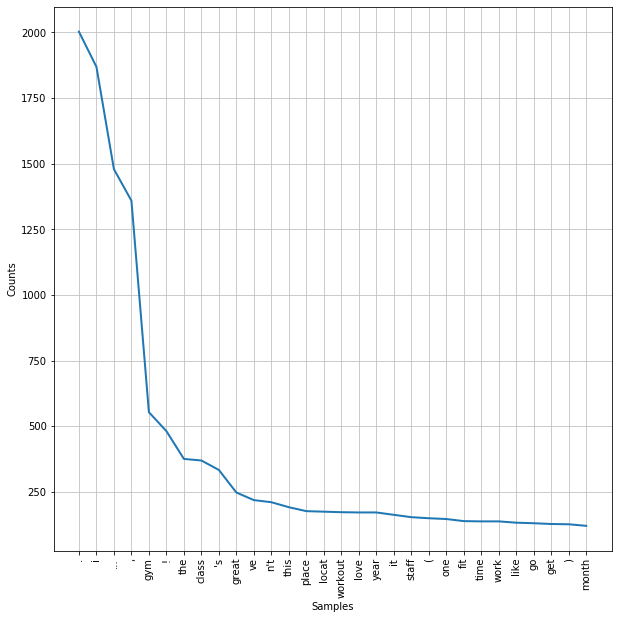

In [25]:
plt.figure(figsize=(10,10))
gym_freq.plot(30)

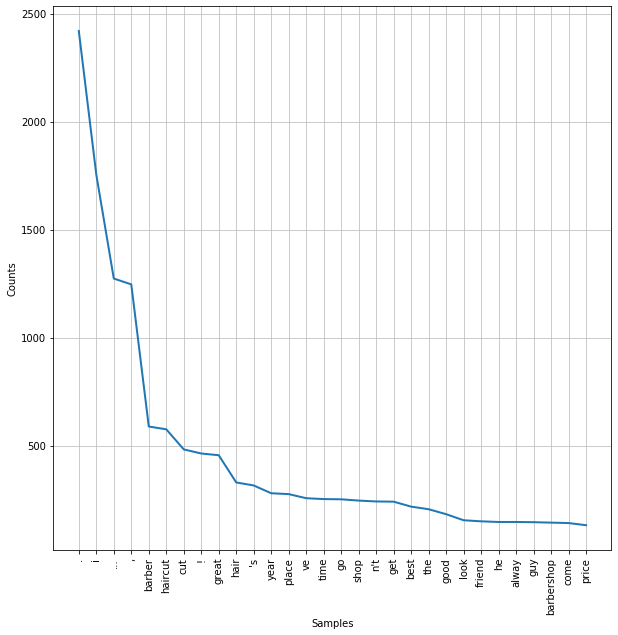

In [26]:
plt.figure(figsize=(10,10))
barber_freq.plot(30)

# Model Data

In [4]:
x = df['Review'].values
y = df['Class'].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size = .2)

In [9]:
stopwords = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words = stopwords)
vectorizer.fit(x_train)
tfidf_x_train = vectorizer.transform(x_train)
tfidf_x_test = vectorizer.transform(x_test)

In [10]:
nb = MultinomialNB(alpha=1)
nb.fit(tfidf_x_train, y_train)
y_train_pred = nb.predict(tfidf_x_train)
y_test_pred = nb.predict(tfidf_x_test)
print('Train F1 Score: ', f1_score(y_train, y_train_pred))
print('Test F1 Score: ', f1_score(y_test, y_test_pred))

Train F1 Score:  0.9966442953020134
Test F1 Score:  0.9309153713298791


[Text(0, 0.5, 'Barber'), Text(0, 1.5, 'Gym')]

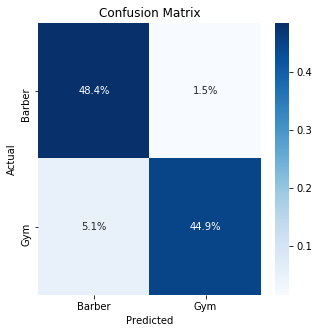

In [53]:
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(5,5))
matrix = sns.heatmap(cm/np.sum(cm), annot=True, ax = ax, cmap = 'Blues', fmt = '.1%')
matrix.set_title('Confusion Matrix')
matrix.set_xlabel('Predicted')
matrix.set_xticklabels(['Barber','Gym'])
matrix.set_ylabel('Actual')
matrix.set_yticklabels(['Barber','Gym'])

In [78]:
rf = RandomForestClassifier()
rf.fit(tfidf_x_train, y_train)
y_train_pred_rf = rf.predict(tfidf_x_train)
y_test_pred_rf = rf.predict(tfidf_x_test)
print('Train F1 Score: ', f1_score(y_train, y_train_pred_rf))
print('Test F1 Score: ', f1_score(y_test, y_test_pred_rf))

Train F1 Score:  1.0
Test F1 Score:  0.928832858885726


[Text(0, 0.5, 'Barber'), Text(0, 1.5, 'Gym')]

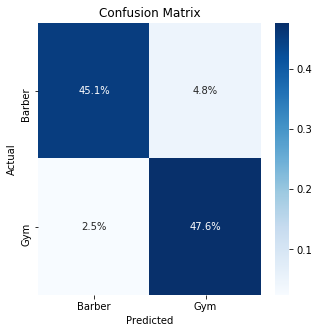

In [79]:
cm = confusion_matrix(y_test, y_test_pred_rf)
fig, ax = plt.subplots(figsize=(5,5))
matrix = sns.heatmap(cm/np.sum(cm), annot=True, ax = ax, cmap = 'Blues', fmt = '.1%')
matrix.set_title('Confusion Matrix')
matrix.set_xlabel('Predicted')
matrix.set_xticklabels(['Barber','Gym'])
matrix.set_ylabel('Actual')
matrix.set_yticklabels(['Barber','Gym'])